In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_cpus = pd.read_csv("logs/log_ordered.csv")
data_2080 = pd.read_csv("logs/log_cuda.csv")
data_2080

,KISS,NSamp,grid_size,num_particles,time,steps,mean_ll,ll_of_mean_f,loss
0,1,1000,64,64,57,1900,0.063298,0.397235,-10.978260
1,1,1000,128,64,35,1400,0.063400,0.462704,-26.716908
2,1,1000,64,64,39,1300,0.063532,0.460565,-12.215736
3,1,1000,64,64,47,1900,0.135847,0.425534,-12.426823
4,1,1000,64,64,42,1400,0.115176,0.489802,-15.739014
5,1,1000,64,64,39,1300,0.030430,0.435811,-11.879101
6,1,1000,64,64,33,1100,0.083154,0.422194,-11.358574
7,1,1000,128,64,39,1300,-0.063633,0.463181,-27.545162
8,1,1000,128,64,39,1300,0.065578,0.467968,-26.074085
9,1,1000,128,64,51,1700,0.198786,0.586381,-38.903831


In [495]:
data = data_2080
# grouped = data[(data['num_particles'] == 64) & (data['grid_size'] == 64)].groupby(['NSamp']).agg(
#                        {'time':['mean','min','max']})
# grouped.reset_index(level=0, inplace=True)
# grouped['time']['mean']
#data['time'] = data['time']/data['steps']
data
#data[data['NSamp'] == 10000]

,KISS,NSamp,grid_size,num_particles,time,steps,mean_ll,ll_of_mean_f,loss
0,1,1000,64,64,57,1900,0.063298,0.397235,-10.978260
1,1,1000,128,64,35,1400,0.063400,0.462704,-26.716908
2,1,1000,64,64,39,1300,0.063532,0.460565,-12.215736
3,1,1000,64,64,47,1900,0.135847,0.425534,-12.426823
4,1,1000,64,64,42,1400,0.115176,0.489802,-15.739014
5,1,1000,64,64,39,1300,0.030430,0.435811,-11.879101
6,1,1000,64,64,33,1100,0.083154,0.422194,-11.358574
7,1,1000,128,64,39,1300,-0.063633,0.463181,-27.545162
8,1,1000,128,64,39,1300,0.065578,0.467968,-26.074085
9,1,1000,128,64,51,1700,0.198786,0.586381,-38.903831


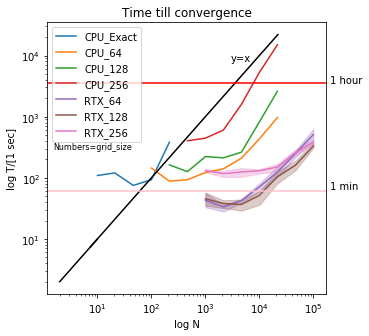

In [496]:
plt.figure(figsize=(5,5))
def plot_time_conv_sing(data):
    plt.plot(data[data['KISS'] == 0]['NSamp'],data[data['KISS'] == 0]['time'], label = "CPU_Exact")
    for grid_size in [2**x for x in range(6,9)]:
        rule = (data['KISS'] == 1) & (data['grid_size'] == grid_size)
        plt.loglog(data[rule]['NSamp'],data[rule]['time'], label = "CPU_{}".format(grid_size))
    x = np.arange(2.,10.,0.1)
    plt.plot(x,x, color='black')
def plot_time_conv(data):
    grouped = data[data['num_particles'] == 64].groupby(['grid_size','NSamp']).agg(
                       {'time':['mean','min','max']})
    grid_sizes = grouped.index.levels[0]
    for grid_size in grid_sizes:
        grouped = data[(data['num_particles'] == 64) & (data['grid_size'] == grid_size)].groupby(['NSamp']).agg(
                       {'time':['mean','min','max']})
        grouped.reset_index(level=0, inplace=True)
        p = plt.loglog(grouped['NSamp'],grouped['time']['mean'], label = "RTX_{}".format(grid_size))
        plt.fill_between(grouped['NSamp'], grouped['time']['min'],
                grouped['time']['max'], color=p[0].get_color(), alpha=0.3)
    x = np.arange(2.,11.,1.)
    plt.plot(np.exp(x),np.exp(x), color='black')
plot_time_conv_sing(data_cpus)
plot_time_conv(data_2080)
plt.text(np.exp(8),np.exp(9),"y=x")
plt.text(1.5,300,"Numbers=grid_size", fontsize=8)
plt.axhline(60, color='pink')
plt.axhline(60*60, color='red')
plt.text(1e5*2,65,"1 min")
plt.text(1e5*2,60*60+5,"1 hour")
plt.title('Time till convergence')
plt.xlabel('log N')
plt.ylabel('log T/[1 sec]')
plt.legend()

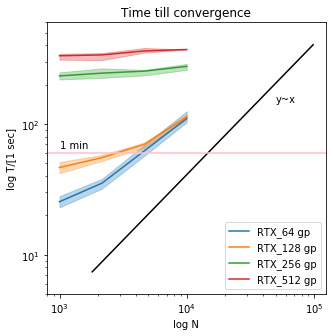

In [497]:
plt.figure(figsize=(5,5))
def plot_time_conv(data, part):
    grouped = data[data['num_particles'] == part].groupby(['grid_size','NSamp']).agg(
                       {'time':['mean','min','max']})
    grid_sizes = grouped.index.levels[0]
    for grid_size in grid_sizes:
        grouped = data[(data['num_particles'] == part) & (data['grid_size'] == grid_size)].groupby(['NSamp']).agg(
                       {'time':['mean','min','max']})
        grouped.reset_index(level=0, inplace=True)
        p = plt.loglog(grouped['NSamp'],grouped['time']['mean'], label = "RTX_{} gp".format(grid_size))
        plt.fill_between(grouped['NSamp'], grouped['time']['min'],
                grouped['time']['max'], color=p[0].get_color(), alpha=0.3)
x = np.arange(2.,7.,1.)
plt.loglog(np.exp(x+5.5),np.exp(x), color='black')
plot_time_conv(data_2080,256)
plt.text(0.5*1e5,np.exp(5),"y~x")
plt.axhline(60, color='pink')
plt.text(1e3,65,"1 min")
plt.ylim(5,600)
plt.title('Time till convergence')
plt.xlabel('log N')
plt.ylabel('log T/[1 sec]')
plt.legend()

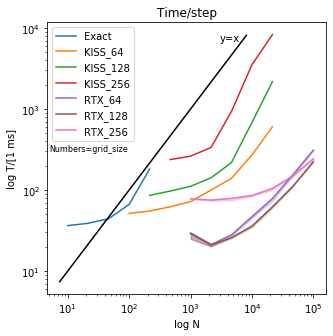

In [370]:
plt.figure(figsize=(5,5))
def plot_time_conv_sing(data):
    plt.loglog(data[data['KISS'] == 0]['NSamp'],1e3*data[data['KISS'] == 0]['time']/data[data['KISS'] == 0]['steps'], label = "Exact")
    for grid_size in [2**x for x in range(6,9)]:
        rule = (data['KISS'] == 1) & (data['grid_size'] == grid_size)
        plt.loglog(data[rule]['NSamp'],1e3*data[rule]['time']/data[rule]['steps'], label = "KISS_{}".format(grid_size))
def plot_time_conv(datar, part):
    data['time'] = 1e3*datar['time']/datar['steps']
    grouped = data[data['num_particles'] == part].groupby(['grid_size','NSamp']).agg(
                       {'time':['mean','min','max']})
    grid_sizes = grouped.index.levels[0]
    for grid_size in grid_sizes:
        grouped = data[(data['num_particles'] == part) & (data['grid_size'] == grid_size)].groupby(['NSamp']).agg(
                       {'time':['mean','min','max']})
        grouped.reset_index(level=0, inplace=True)
        p = plt.loglog(grouped['NSamp'],grouped['time']['mean'], label = "RTX_{}".format(grid_size))
        plt.fill_between(grouped['NSamp'], grouped['time']['min'],
                grouped['time']['max'], color=p[0].get_color(), alpha=0.3)
    x = np.arange(2.,10.,1.)
    plt.plot(np.exp(x),np.exp(x), color='black')
plot_time_conv_sing(data_cpus)
plot_time_conv(data_2080,64)
plt.text(3000,7000,"y=x")
plt.text(5,300,"Numbers=grid_size", fontsize=8)
#plt.ylim(5,600)
plt.title('Time/step')
plt.xlabel('log N')
plt.ylabel('log T/[1 ms]')
plt.legend()

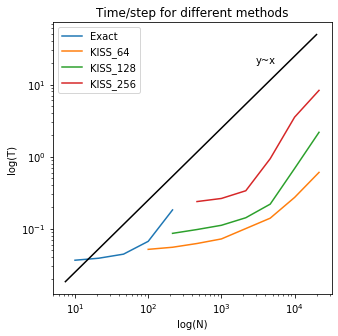

In [327]:
plt.figure(figsize=(5,5))
data = data_cpus
plt.loglog(data[data['KISS'] == 0]['NSamp'],data[data['KISS'] == 0]['time']/data[data['KISS'] == 0]['steps'], label = "Exact")
for grid_size in [2**x for x in range(6,9)]:
    rule = (data['KISS'] == 1) & (data['grid_size'] == grid_size)
    plt.loglog(data[rule]['NSamp'],data[rule]['time']/data[rule]['steps'], label = "KISS_{}".format(grid_size))
x = np.arange(2.,10.,0.1)
plt.loglog(np.exp(x),np.exp(x-6), color='black')
plt.text(np.exp(8),np.exp(3),"y~x")
plt.title('Time/step for different methods')
plt.xlabel('log(N)')
plt.ylabel('log(T)')
plt.legend()

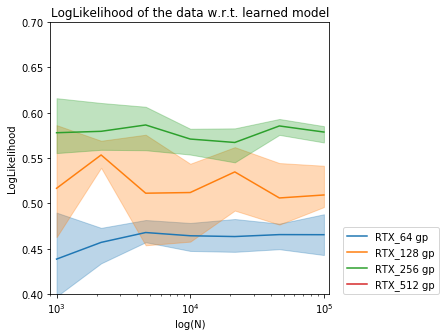

In [476]:
plt.figure(figsize=(5,5))
def plot_time_conv_sing(data):
    for grid_size in [2**x for x in range(6,9)]:
        rule = (data['KISS'] == 1) & (data['grid_size'] == grid_size)
        plt.semilogx(data[rule]['NSamp'],data[rule]['ll_of_mean_f'], label = "CPU_{} gp".format(grid_size))
def plot_time_conv(data,part):
    for grid_size in [2**x for x in range(6,10)]:    
        grouped = data[(data['num_particles'] == part) & (data['grid_size'] == grid_size)].groupby(['NSamp']).agg(
                       {'ll_of_mean_f':['mean','min','max']})
        grouped.reset_index(level=0, inplace=True)
        p = plt.semilogx(grouped['NSamp'],grouped['ll_of_mean_f']['mean'], label = "RTX_{} gp".format(grid_size))
        plt.fill_between(grouped['NSamp'], grouped['ll_of_mean_f']['min'],
                grouped['ll_of_mean_f']['max'], color=p[0].get_color(), alpha=0.3)
#plot_time_conv_sing(data_cpus)
#plot_time_conv(data_2080,64)
plot_time_conv(data_2080,64)
plt.xlim(0.9*1e3,1.1*1e5)
plt.ylim(0.4,0.7)
plt.title('LogLikelihood of the data w.r.t. learned model')
plt.xlabel('log(N)')
plt.ylabel('LogLikelihood')
plt.legend(loc=(1.05,0))

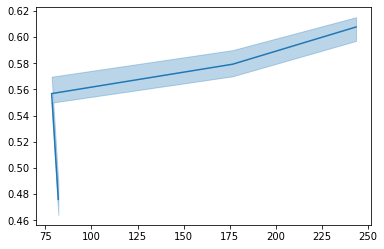

In [493]:
part = 128
data = data_2080
grouped = data[(data['num_particles'] == part) & (data['NSamp'] == 1e4)].groupby(['grid_size']).agg(
                       {'ll_of_mean_f':['mean','min','max'],'time':['mean','min','max']})
grouped.reset_index(level=0, inplace=True)
p = plt.plot(grouped['time']['mean'],grouped['ll_of_mean_f']['mean'], label = "RTX_{} gp".format(grid_size))
plt.fill_between(grouped['time']['mean'], grouped['ll_of_mean_f']['min'],
                 grouped['ll_of_mean_f']['max'], color=p[0].get_color(), alpha=0.3)

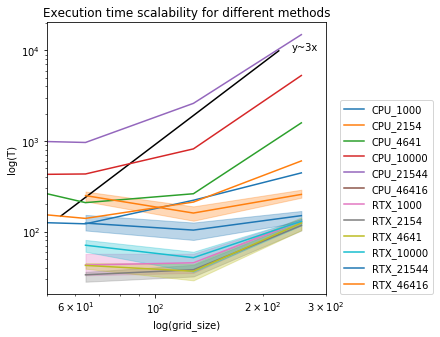

In [451]:
plt.figure(figsize=(5,5))
def plot_time_conv_sing(data):
    for N in np.exp(np.arange(3,5,0.333334)*np.log(10)).astype("int"):
        rule = (data['KISS'] == 1) & (data['NSamp'] == N)
        plt.loglog(data[rule]['grid_size'],data[rule]['time'], label = "CPU_{}".format(N))
def plot_time_conv(data,part):
    for N in np.exp(np.arange(3,5,0.333334)*np.log(10)).astype("int"):
        grouped = data[(data['num_particles'] == part) & (data['NSamp'] == N)].groupby(['grid_size']).agg(
                       {'time':['mean','min','max']})
        grouped.reset_index(level=0, inplace=True)
        p = plt.loglog(grouped['grid_size'],grouped['time']['mean'], label = "RTX_{}".format(N))
        plt.fill_between(grouped['grid_size'], grouped['time']['min'],
                grouped['time']['max'], color=p[0].get_color(), alpha=0.3)
x = np.arange(2.,3.5,0.1)
plt.loglog(np.exp(x+2),np.exp(3*x-1), color='black')
plt.text(240,1e4,"y~3x")
plt.xlim(50,300)
plot_time_conv_sing(data_cpus)
plot_time_conv(data_2080,64)
plt.title('Execution time scalability for different methods')
plt.xlabel('log(grid_size)')
plt.ylabel('log(T)')
plt.legend(loc=(1.05,0))

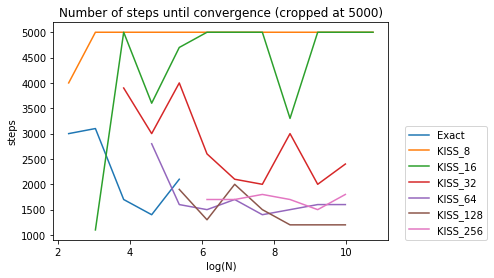

In [64]:
plt.plot(np.log(data[data['KISS'] == 0][' NSamp']),data[data['KISS'] == 0][' steps'], label = "Exact")
for grid_size in [2**x for x in range(3,9)]:
    rule = (data['KISS'] == 1) & (data[' grid_size'] == grid_size)
    plt.plot(np.log(data[rule][' NSamp']),data[rule][' steps'], label = "KISS_{}".format(grid_size))
plt.title('Number of steps until convergence (cropped at 5000)')
plt.xlabel('log(N)')
plt.ylabel('steps')
plt.legend(loc=(1.05,0))

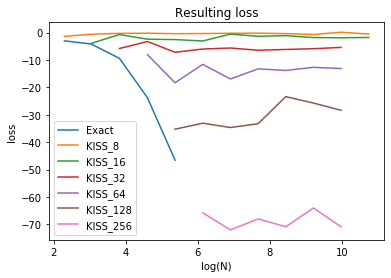

In [28]:
plt.plot(np.log(data[data['KISS'] == 0][' NSamp']),data[data['KISS'] == 0][' loss'], label = "Exact")
for grid_size in [2**x for x in range(3,9)]:
    rule = (data['KISS'] == 1) & (data[' grid_size'] == grid_size)
    plt.plot(np.log(data[rule][' NSamp']),data[rule][' loss'], label = "KISS_{}".format(grid_size))
plt.title('Resulting loss')
plt.xlabel('log(N)')
plt.ylabel('loss')
plt.legend()

In [16]:
(int(819/60),819%60) #10k set, grid_size = 128

(13, 39)

In [82]:
(int(433/60),433%60) #10k set, grid_size = 128

(7, 13)